In [ ]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/math120_final/'): # This one and the git clone name bellow has to match
        !git clone https://github.com/Branmejia1/math120_final.git

    # Change to project directory
    os.chdir('/content/math120_final')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Current working directory: /content/math120_final


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# LOAD RAW DATA
income_raw = pd.read_csv('/content/math120_final/data/64_mobility-metrics_place_income_longitudinal.csv', encoding='latin1')
education_raw = pd.read_csv('/content/math120_final/data/20_mobility-metrics_county_mothers_education_longitudinal.csv', encoding='latin1')
industry_raw = pd.read_csv('/content/math120_final/data/19_mobility-metrics_county_industry_longitudinal.csv', encoding='latin1')
tenure_raw = pd.read_csv('/content/math120_final/data/67_mobility-metrics_place_tenure_longitudinal.csv', encoding='latin1')

print("Income shape:", income_raw.shape)
print("Education shape:", education_raw.shape)
print("Industry shape:", industry_raw.shape)
print("Tenure shape:", tenure_raw.shape)

income_raw.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/math120_final/data/64_mobility-metrics_place_income_longitudinal.csv'

In [ ]:
edu_fresno = education_raw[education_raw['county_name'] == 'Fresno County']
industry_fresno = industry_raw[industry_raw['county_name'] == 'Fresno County']
edu_fresno.head()
industry_fresno.head()

,year,state,county,state_name,county_name,subgroup,subgroup_type,ratio_living_wage,ratio_living_wage_quality
1560,2014,6,19,California,Fresno County,All,all,0.587321,Strong
1561,2014,6,19,California,Fresno County,Goods Producing,industry,0.511964,Strong
1562,2014,6,19,California,Fresno County,Public Administration,industry,0.810286,Strong
1563,2014,6,19,California,Fresno County,"Trade, Transit, Utilities",industry,0.577999,Strong
1564,2014,6,19,California,Fresno County,Information Services,industry,1.201057,Strong


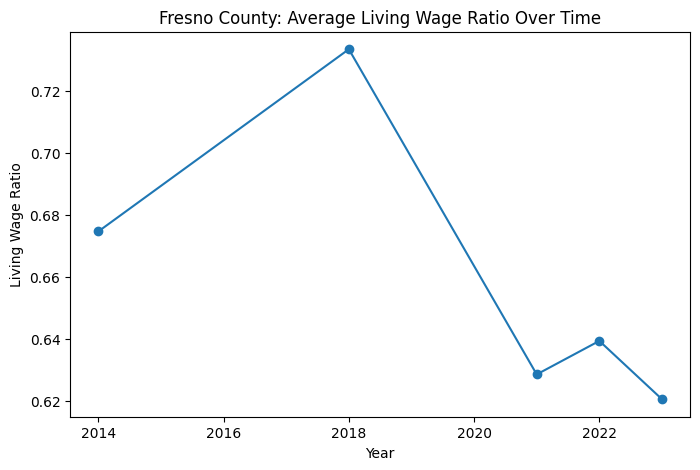

In [ ]:
industry_fresno_clean = industry_fresno[['year','subgroup','ratio_living_wage']]
industry_fresno_clean.head()
industry_year_trend = industry_fresno_clean.groupby('year')['ratio_living_wage'].mean()

plt.figure(figsize=(8,5))
industry_year_trend.plot(kind='line', marker='o')
plt.title('Fresno County: Average Living Wage Ratio Over Time')
plt.ylabel('Living Wage Ratio')
plt.xlabel('Year')
plt.show()


Explain the graph

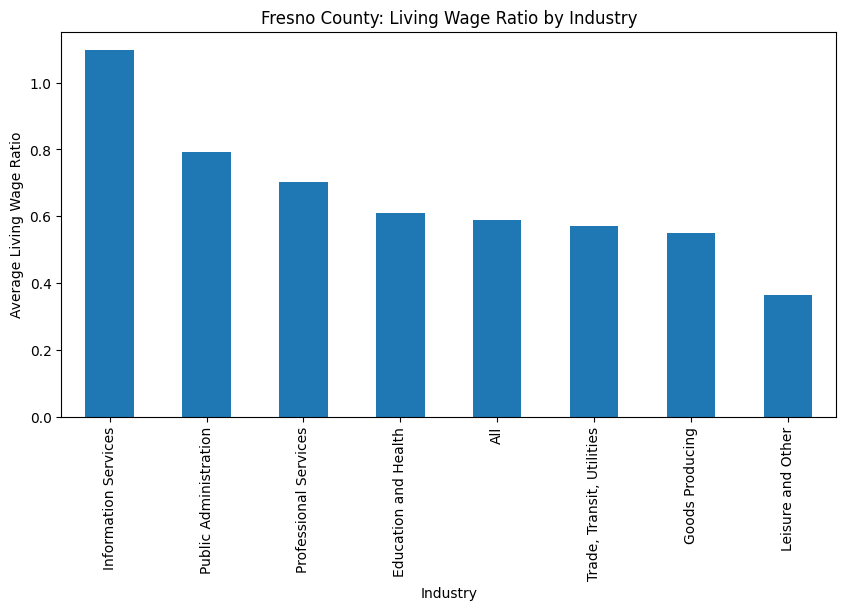

In [ ]:
industry_subgroup = industry_fresno_clean.groupby('subgroup')['ratio_living_wage'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
industry_subgroup.plot(kind='bar')
plt.title('Fresno County: Living Wage Ratio by Industry')
plt.ylabel('Average Living Wage Ratio')
plt.xlabel('Industry')
plt.show()


Explain the graph